# Encoding Text & Dimensionality Reduction

* Read about the data sets
  * Newsgroups: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.hbase
* Experiment with feature extraction on the newsgroup data. For example:
 * Change which newsgroups are included (be ware of using too much data)
 * Change the feature extraction: word counts vs tf-idf, ngrams for words and characters
* Change the distance matrics for tSNE and UMAP

In [ ]:
import numpy as np

import io
from tqdm import tqdm
import ipywidgets

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

## Data
Let's load the data.s.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer()
X = np.asarray(vectorizer.fit_transform(newsgroups_train.data).todense())
y = newsgroups_train.target
labels = newsgroups_train.target_names

## Linear dimensionality reduction

Principal component analysis (PCA) finds a subspace ...

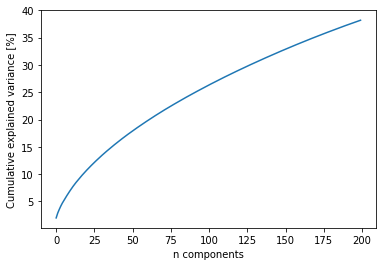

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=min(200, X.shape[1]//2))
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.ylabel("Cumulative explained variance [%]")
plt.xlabel("n components")
plt.show()

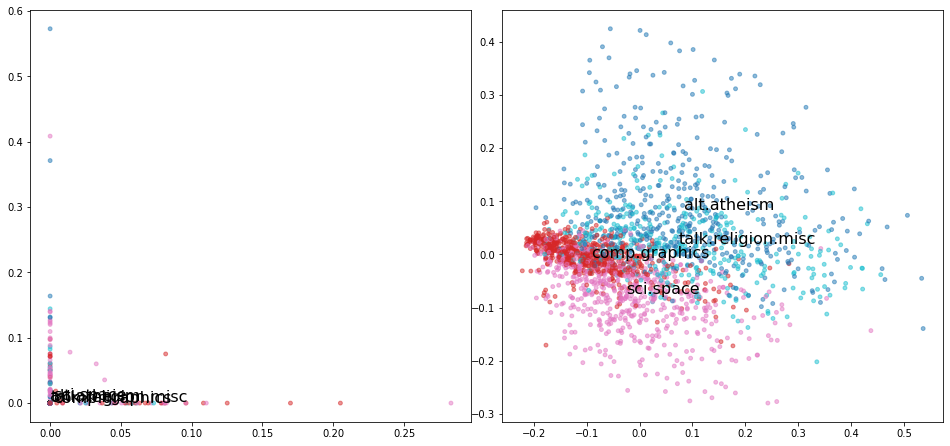

In [ ]:
def plot_2d(X, y, labels, ax=None):
  if ax is None:
    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = fig.subplots(1, 1)
  ax.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='tab10', alpha=.5)
  for label in np.unique(y):
    ax.text(np.mean(X[y==label, 0]),
            np.mean(X[y==label, 1]),
            labels[label],
            fontsize=16, zorder=1)
  if ax is None:
    fig.tight_layout(pad=0)
    fig.show()

fig = plt.figure(figsize=(13, 6))
ax = fig.subplots(1, 2)
plot_2d(X, y, labels, ax[0])
plot_2d(X_pca, y, labels, ax[1])
fig.tight_layout(pad=0)
fig.show()

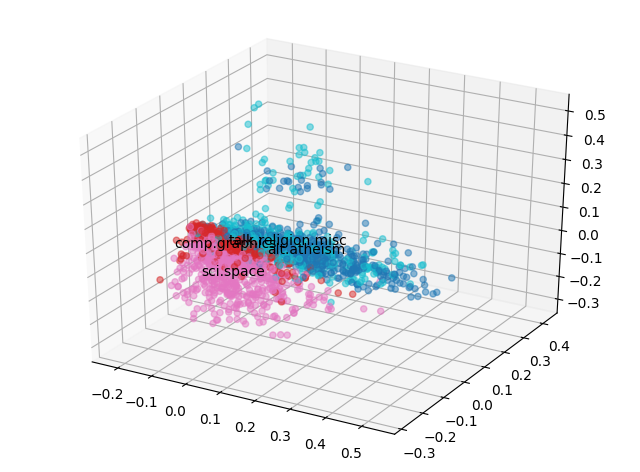

In [ ]:
def plot_3d(X, y, labels, angle=None, ax=None):
  if ax is None:
    fig = plt.figure(figsize=(8, 6), dpi=100)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
  ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
              alpha=.5, cmap='tab10')
  for label in np.unique(y):
    ax.text(np.mean(X[y==label, 0]),
            np.mean(X[y==label, 1]),
            np.mean(X[y==label, 2]),
            labels[label],
            fontsize=10,
            horizontalalignment='center',
            verticalalignment='center')
  if angle is not None:
    ax.view_init(20, angle % 360)
  if ax is None:
    fig.tight_layout(pad=0)
    fig.show()

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(1, 1, 1, projection='3d')
plot_3d(X_pca, y, labels, ax=ax)
fig.show()

In [ ]:
interact_plot = ipywidgets.interact(lambda angle: plot_3d(X_pca, y, labels, angle=angle),
                                    angle=ipywidgets.IntSlider(value=0, min=0, max=359, step=1, description="View angle"));
output = interact_plot.widget.children[-1] # This should prevent flickering
output.layout.height = '500px'

interactive(children=(IntSlider(value=0, description='View angle', max=359), Output()), _dom_classes=('widget-…








Creating video:   0%|          | 0/360 [00:00<?, ?it/s]






Creating video:   0%|          | 1/360 [00:00<03:34,  1.68it/s]






Creating video:   1%|          | 2/360 [00:00<02:52,  2.08it/s]






Creating video:   1%|          | 3/360 [00:01<02:20,  2.54it/s]






Creating video:   1%|          | 4/360 [00:01<01:59,  2.97it/s]






Creating video:   1%|▏         | 5/360 [00:01<01:45,  3.35it/s]






Creating video:   2%|▏         | 6/360 [00:01<01:35,  3.72it/s]






Creating video:   2%|▏         | 7/360 [00:01<01:29,  3.95it/s]






Creating video:   2%|▏         | 8/360 [00:02<01:23,  4.22it/s]






Creating video:   2%|▎         | 9/360 [00:02<01:20,  4.37it/s]






Creating video:   3%|▎         | 10/360 [00:02<01:17,  4.50it/s]






Creating video:   3%|▎         | 11/360 [00:02<01:15,  4.63it/s]






Creating video:   3%|▎         | 12/360 [00:02<01:13,  4.73it/s]






Creating video:   4%|▎         | 13/360 [00:03<01:14,  4.68it/s]






Creating video:  

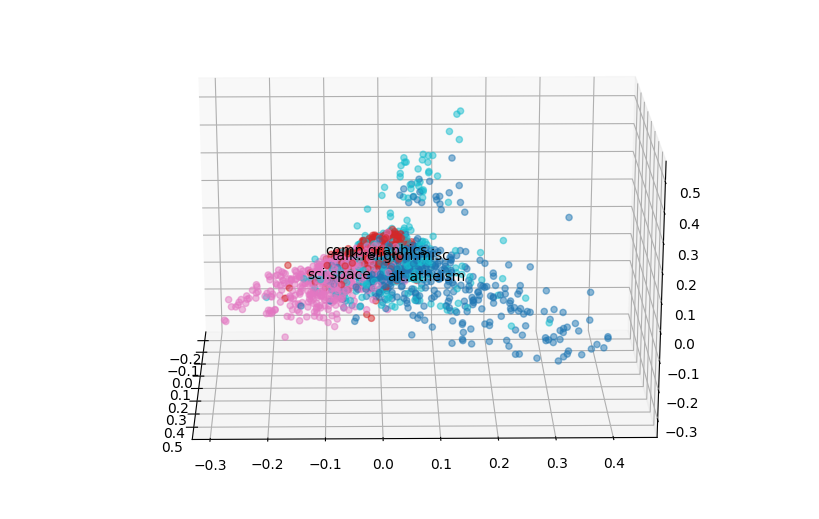

In [ ]:
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1, projection='3d')
plot_3d(X_pca, y, labels, ax=ax)
fig.tight_layout(pad=0)

def init():
    ax.view_init(20, 0)
    return fig,

def update(frame):
    angle = frame % 360
    ax.view_init(20, angle)
    return fig,

anim = FuncAnimation(fig, update, frames=tqdm(range(1, 360, 2), total=360, desc="Creating video"), interval=1000//20, init_func=init, blit=True, )
anim.save('pca.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
HTML(anim.to_html5_video())
# anim.save('pca.gif', writer='imagemagick', fps=20)

## Non-linear dimensionality reduction

### t-SNE

In [ ]:
try:
  from MulticoreTSNE import MulticoreTSNE as TSNE
except:
  !pip install MulticoreTSNE
finally:
  from MulticoreTSNE import MulticoreTSNE as TSNE
import os

  Created wheel for MulticoreTSNE: filename=MulticoreTSNE-0.1-cp37-cp37m-linux_x86_64.whl size=68502 sha256=b974d4269b1b21fd38ab5a4159c5830ff893c81ca22f7d347927d39de4ad0396
  Stored in directory: /root/.cache/pip/wheels/27/59/53/3b52ee63add3692254c30d687fa4dff4d128d0557861fb028e
Successfully built MulticoreTSNE


In [ ]:
tsne = TSNE(n_components=2, metric='euclidean', n_jobs=os.cpu_count())
# tsne = TSNE(n_components=2, metric='cosine', n_jobs=os.cpu_count())
X_tsne2 = tsne.fit_transform(X)

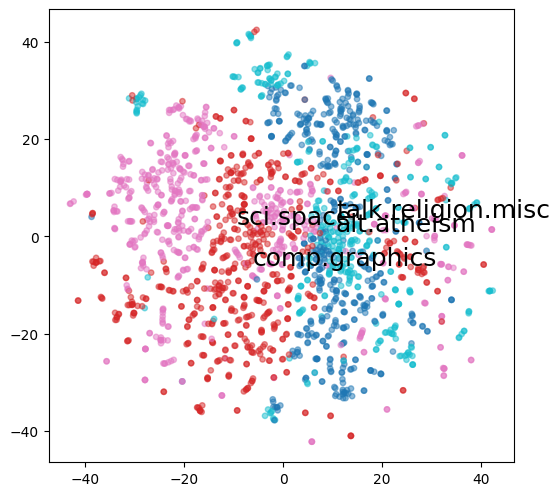

In [ ]:
plot_2d(X_tsne2, y, labels)

In [ ]:
tsne = TSNE(n_components=3, metric='euclidean', n_jobs=os.cpu_count())
# tsne = TSNE(n_components=2, metric='cosine', n_jobs=os.cpu_count())
X_tsne3 = tsne.fit_transform(X)

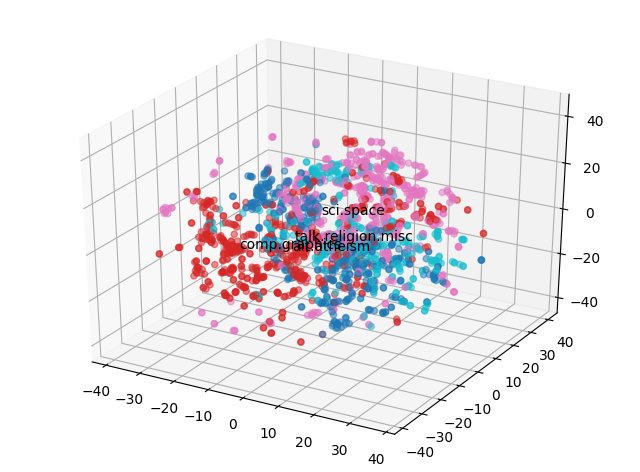

In [ ]:
plot_3d(X_tsne3, y, labels)




Creating video:   0%|          | 0/360 [00:00<?, ?it/s]


Creating video:   0%|          | 1/360 [00:00<03:30,  1.70it/s]


Creating video:   1%|          | 2/360 [00:00<02:50,  2.09it/s]


Creating video:   1%|          | 3/360 [00:00<02:19,  2.56it/s]


Creating video:   1%|          | 4/360 [00:01<01:57,  3.03it/s]


Creating video:   1%|▏         | 5/360 [00:01<01:42,  3.45it/s]


Creating video:   2%|▏         | 6/360 [00:01<01:36,  3.68it/s]


Creating video:   2%|▏         | 7/360 [00:01<01:29,  3.95it/s]


Creating video:   2%|▏         | 8/360 [00:02<01:21,  4.30it/s]


Creating video:   2%|▎         | 9/360 [00:02<01:17,  4.52it/s]


Creating video:   3%|▎         | 10/360 [00:02<01:15,  4.65it/s]


Creating video:   3%|▎         | 11/360 [00:02<01:13,  4.77it/s]


Creating video:   3%|▎         | 12/360 [00:02<01:13,  4.76it/s]


Creating video:   4%|▎         | 13/360 [00:03<01:11,  4.87it/s]


Creating video:   4%|▍         | 14/360 [00:03<01:10,  4.93it/s]


Creating v

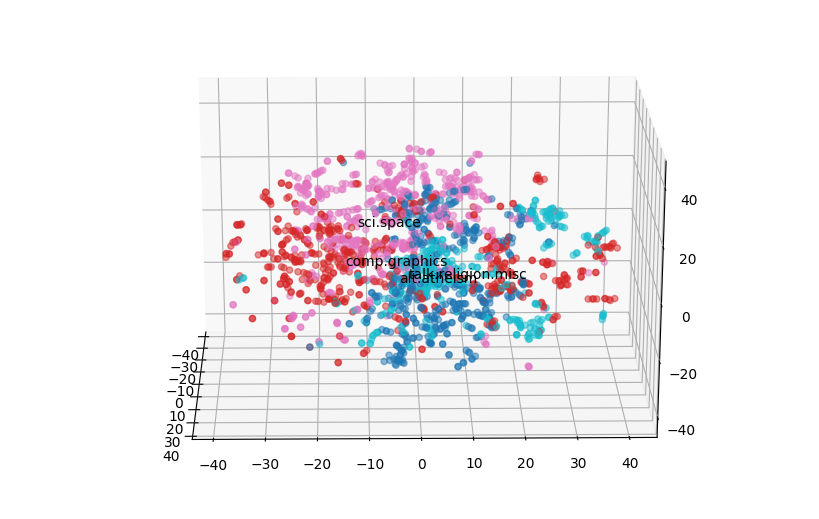

In [ ]:
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1, projection='3d')
plot_3d(X_tsne3, y, labels, ax=ax)
fig.tight_layout(pad=0)

def init():
    ax.view_init(20, 0)
    return fig,

def update(frame):
    angle = frame % 360
    ax.view_init(20, angle)
    return fig,

anim = FuncAnimation(fig, update, frames=tqdm(range(1, 360, 2), total=360, desc="Creating video"), interval=1000//20, init_func=init, blit=True, )
anim.save('tsne.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
HTML(anim.to_html5_video())
# anim.save('tsne.gif', writer='imagemagick', fps=20)

### UMAP

In [ ]:
try:
  from umap import UMAP
except:
  !pip install umap-learn
finally:
  from umap import UMAP

In [ ]:
umap = UMAP(n_components=2, metric='euclidean')
# umap = UMAP(n_components=2, metric='cosine')
X_umap2 = umap.fit_transform(X)

In [ ]:
plot_2d(X_umap2, y, labels)

In [ ]:
umap = UMAP(n_components=3, metric='euclidean')
# umap = UMAP(n_components=3, metric='cosine')
X_umap3 = umap.fit_transform(X)

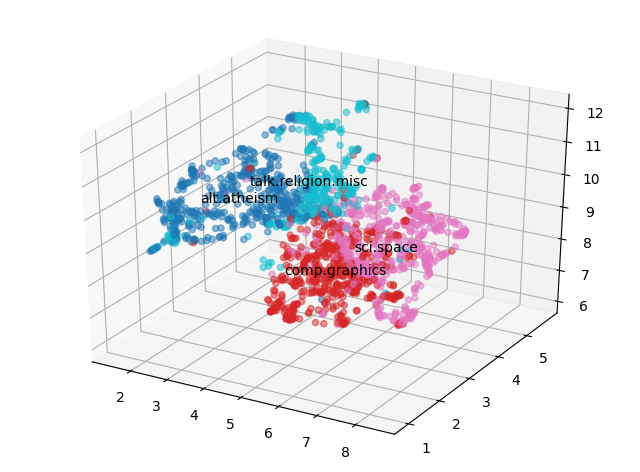

In [ ]:
plot_3d(X_umap3, y, labels)

In [ ]:
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1, projection='3d')
plot_3d(X_umap3, y, labels, ax=ax)
fig.tight_layout(pad=0)

def init():
    ax.view_init(20, 0)
    return fig,

def update(frame):
    angle = frame % 360
    ax.view_init(20, angle)
    return fig,

anim = FuncAnimation(fig, update, frames=tqdm(range(1, 30, 2), total=360, desc="Creating video"), interval=1000//20, init_func=init, blit=True, )
anim.save('umap.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
HTML(anim.to_html5_video())
# anim.save('umap.gif', writer='imagemagick', fps=20)